In [33]:
import numpy as np
from PIL import Image
# import pickle
import matplotlib.pyplot as plt
import os

# https://gist.github.com/EncodeTS/6bbe8cb8bebad7a672f0d872561782d9
from vggFaceModel import vgg_face

In [11]:
model = vgg_face('vggFace/vgg_face_weights.h5')
print(model.summary())

2021-09-16 13:24:34.654273: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [34]:
def reshapeImage(path):
    im = Image.open(path)
    im = im.resize((224,224))
    im = np.array(im).astype(np.float32) / 255
    im = np.expand_dims(im, axis=0)
    return im

In [35]:
def img_to_encoding(path):
    im = reshapeImage(path)
    out = model.predict(im)
    return out

In [36]:
def distance(encoding1, endcoding2):
    return np.linalg.norm(encoding1 - endcoding2)

In [37]:
def triplet_loss(anchor, postive, negative, margin=0.2):
    loss = (distance(anchor, postive)**2) - (distance(anchor, negative)**2) + margin
    loss = max(loss, 0)
    return loss

In [38]:
def find_closest(database, encoding):
    lowest_similarity = 100
    closest_person = None
    for person in database:
        current_similarity = distance(person['encoding'], encoding)
        if current_similarity < lowest_similarity:
            closest_person = person
            lowest_similarity = current_similarity
    return closest_person

In [22]:
faces_dir = os.listdir('./faces')
names = [name.strip('.jpg').replace('-', ' ') for name in faces_dir]
encodings = []
for i in range(len(names)):
    path = f'faces/{faces_dir[i]}'
    encoding = img_to_encoding(path)
    encodings.append({
        "name": names[i],
        "path": path,
        "encoding": encoding
    })

2021-09-16 13:29:49.493391: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


In [24]:
def plot_images(paths):
    f, axarr = plt.subplots(1, len(paths))
    for i in range(len(paths)):
        axarr[i].imshow(Image.open(paths[i]))

found travis scott with 0.6615375876426697 similarity


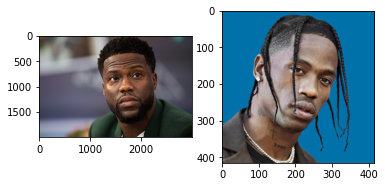

In [41]:
input_img_path = 'me.jpg'
encoding = img_to_encoding(input_img_path)
closest_person = find_closest(encodings, encoding)
closest_similarity = 1 - distance(closest_person['encoding'], encoding)
plot_images([input_img_path, closest_person['path']])
print('found '+closest_person['name']+' with '+str(closest_similarity)+' similarity')